#  Deep GAN for CIFAR10 Dataset

In [2]:
#Load the dataset
from keras.datasets import cifar10
(xtrain,ytrain),(xtest,ytest)=cifar10.load_data()
print('Train Shape:\t',xtrain.shape,ytrain.shape)
print()
print('Test Shape:\t',xtest.shape,ytest.shape)

Train Shape:	 (50000, 32, 32, 3) (50000, 1)

Test Shape:	 (10000, 32, 32, 3) (10000, 1)


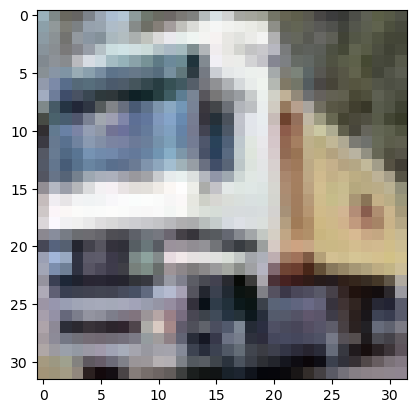

In [10]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[1])

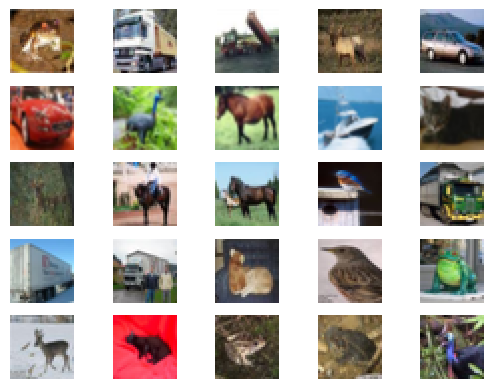

In [11]:
for i in range(25):
    plt.subplot(5,5,1+i)
    plt.axis('off')
    plt.imshow(xtrain[i],cmap='gray_r')
plt.show()

In [12]:
#Import all required libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D,Flatten,Dropout
from keras.layers import LeakyReLU
from keras.optimizers import Adam
from keras.utils import plot_model

In [38]:
def discriminator(in_shape=(32,32,3)):
    model=Sequential()
    #1st conv layer
    model.add(Conv2D(64,(3,3),strides=(2,2),padding='same',input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))

    #2nd conv layer
    model.add(Conv2D(64,(3,3),strides=(2,2),padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))

    #converting higher dimes into one dimen
    model.add(Flatten())

    #output layer
    model.add(Dense(1,activation='sigmoid'))

    #Compile model
    opt=Adam(learning_rate=0.0002,beta_1=0.5)

    model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

    return model
model=discriminator()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        1792      
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 16, 16, 64)        0         
                                                                 
 dropout_8 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 8, 8, 64)          0         
                                                                 
 dropout_9 (Dropout)         (None, 8, 8, 64)          0         
                                                                 
 flatten_4 (Flatten)         (None, 4096)             

# Load & prepare the cifar10 training images

In [39]:
from numpy import expand_dims,ones,zeros
def load_real_samples():
    (xtrain,_),(_,_)=cifar10.load_data()
    x=expand_dims(xtrain,axis=-1)
    x=x.astype('float32')
    x=x/255.
    return x

In [40]:
dataset = load_real_samples()

In [41]:
#select real images
from numpy.random import rand,randint
def generate_real_samples(dataset,n_samples):
    ix=randint(0,dataset.shape[0],n_samples)
    x=dataset[ix]
    #generate 'real' class labels
    y=ones((n_samples,1))
    return x,y

In [42]:
generate_real_samples(load_real_samples(),n_samples=10)

(array([[[[[0.36078432],
           [0.5294118 ],
           [0.7058824 ]],
 
          [[0.3647059 ],
           [0.53333336],
           [0.70980394]],
 
          [[0.36862746],
           [0.5372549 ],
           [0.7137255 ]],
 
          ...,
 
          [[0.38039216],
           [0.54901963],
           [0.7254902 ]],
 
          [[0.3764706 ],
           [0.54509807],
           [0.72156864]],
 
          [[0.37254903],
           [0.5372549 ],
           [0.7137255 ]]],
 
 
         [[[0.36078432],
           [0.5294118 ],
           [0.7058824 ]],
 
          [[0.36862746],
           [0.5372549 ],
           [0.7137255 ]],
 
          [[0.37254903],
           [0.5411765 ],
           [0.7176471 ]],
 
          ...,
 
          [[0.38039216],
           [0.54901963],
           [0.7254902 ]],
 
          [[0.3764706 ],
           [0.54509807],
           [0.72156864]],
 
          [[0.37254903],
           [0.5372549 ],
           [0.7137255 ]]],
 
 
         [[[0.3647059 ],

In [45]:
# generate n fake samples with class labels
from numpy import expand_dims, ones, zeros, random
def generate_fake_samples(n_samples):
    x = random.rand(32 * 32 * 3 * n_samples)
    x = x.reshape((n_samples, 32, 32, 3))
    y = zeros((n_samples, 1))
    return x, y

In [46]:
generate_fake_samples(10)

(array([[[[3.65448086e-01, 7.77103899e-01, 6.42218536e-01],
          [5.29589987e-01, 6.16927402e-01, 8.56593097e-02],
          [9.20606358e-01, 8.64263795e-01, 1.67699478e-01],
          ...,
          [6.24235735e-02, 5.37323448e-01, 4.11753771e-01],
          [6.80598832e-01, 2.02700340e-01, 3.40500254e-01],
          [3.32339861e-03, 4.95705412e-01, 8.18554447e-01]],
 
         [[3.27515873e-01, 1.60642370e-01, 2.56649961e-03],
          [7.22880995e-01, 2.27427200e-01, 1.52304359e-01],
          [9.22542944e-01, 7.04696285e-01, 7.58609915e-02],
          ...,
          [3.73460206e-01, 9.40989685e-01, 7.67926676e-01],
          [9.70753902e-01, 4.10720407e-01, 8.63935839e-01],
          [1.20303926e-01, 4.39266306e-01, 6.75559993e-01]],
 
         [[7.92367992e-01, 5.41294538e-02, 2.60229253e-01],
          [5.05433440e-01, 4.32962438e-01, 8.21243231e-01],
          [4.18049514e-01, 7.76373650e-01, 1.68194362e-01],
          ...,
          [6.57556895e-01, 2.11497719e-01, 5.7641

# Train the Discriminator model

In [47]:
def train_discriminator(model,dataset,n_iter=100,n_batch=256):
    half_batch=int(n_batch//22)
 
    for i in range(n_iter):
        #get randomly selected 'real' images
        xreal,yreal=generate_real_samples(dataset,half_batch)

        #update discriminator on real images
        _,real_acc=model.train_on_batch(xreal,yreal)
        
        #generate 'fake' images
        xfake,yfake=generate_fake_samples(half_batch)

        #update discriminator fake samples

        _,fake_acc=model.train_on_batch(xfake,yfake)

        #summarize performance
        print('>%d real=%.0f%% fake=%.0f%%'%(i+1,real_acc*100,fake_acc*100))


In [48]:
#define the discriminator model
model=discriminator()
#load image data
dataset=load_real_samples()


In [49]:
train_discriminator(model,dataset)

>1 real=64% fake=27%
>2 real=73% fake=36%
>3 real=100% fake=45%
>4 real=64% fake=45%
>5 real=45% fake=36%
>6 real=64% fake=45%
>7 real=73% fake=64%
>8 real=82% fake=64%
>9 real=64% fake=27%
>10 real=36% fake=36%
>11 real=64% fake=45%
>12 real=27% fake=64%
>13 real=27% fake=73%
>14 real=55% fake=36%
>15 real=36% fake=73%
>16 real=36% fake=55%
>17 real=45% fake=64%
>18 real=45% fake=73%
>19 real=36% fake=64%
>20 real=27% fake=64%
>21 real=36% fake=82%
>22 real=45% fake=73%
>23 real=36% fake=73%
>24 real=55% fake=91%
>25 real=45% fake=91%
>26 real=27% fake=91%
>27 real=27% fake=82%
>28 real=45% fake=73%
>29 real=73% fake=91%
>30 real=36% fake=100%
>31 real=36% fake=73%
>32 real=27% fake=100%
>33 real=0% fake=100%
>34 real=27% fake=91%
>35 real=27% fake=91%
>36 real=27% fake=91%
>37 real=27% fake=100%
>38 real=9% fake=100%
>39 real=27% fake=100%
>40 real=27% fake=100%
>41 real=27% fake=100%
>42 real=9% fake=100%
>43 real=45% fake=100%
>44 real=27% fake=100%
>45 real=36% fake=100%
>46 real=

# Generator model

In [50]:
from keras.layers import Reshape
from keras.layers import Conv2DTranspose
# define the standalone generator model
def generator(latent_dim):
    model = Sequential()
    # foundation for 7x7 image
    n_nodes = 128 * 7 * 7
    model.add(Dense(n_nodes, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((7, 7, 128)))
    # upsample to 14x14
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # upsample to 28x28
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(1, (7,7), activation='sigmoid', padding='same'))
    return model

In [51]:
# define the size of the latent space
latent_dim = 100
# define the generator model
model = generator(latent_dim)
# summarize the model
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 6272)              633472    
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 14, 14, 128)       262272    
 anspose)                                                        
                                                                 
 leaky_re_lu_13 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 28, 28, 128)       262272    
 Transpose)                                           

In [52]:
import numpy as np
from numpy.random import randn
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
    # generate points in the latent space
    x_input = randn(latent_dim * n_samples)
    # reshape into a batch of inputs for the network
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input

In [53]:
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(g_model, latent_dim, n_samples):
    # generate points in latent space
    x_input = generate_latent_points(latent_dim, n_samples)
    # predict outputs
    X = g_model.predict(x_input)
    # create ✬fake✬ class labels (0)
    y = zeros((n_samples, 1))
    return X, y


1/1 [==============================] - 0s 372ms/step


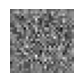

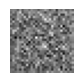

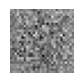

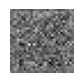

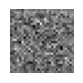

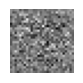

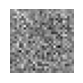

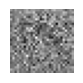

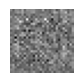

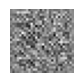

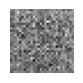

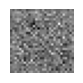

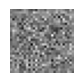

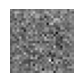

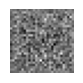

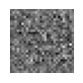

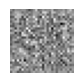

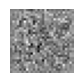

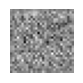

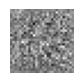

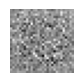

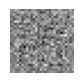

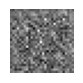

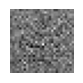

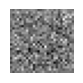

In [54]:
# size of the latent space
latent_dim = 100
# define the discriminator model
model = generator(latent_dim)
# generate samples
n_samples = 25
x, _ = generate_fake_samples(model, latent_dim, n_samples)
# plot the generated samples
for i in range(n_samples):
    # define subplot
    plt.subplot(5, 5, 1 + i)
    # turn off axis labels
    plt.axis('off')
    # plot single image
    plt.imshow(x[i, :, :, 0], cmap='gray_r')
    # show the figure
    plt.show()
